<a href="https://colab.research.google.com/github/AshwiniKatariya07/Deep-Learning-Projects/blob/master/Malaria_detection_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating CNN from scratch and using Transfer Learning for predicting malaria disease.

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# re-sizing image size
image_size = [224,224]
train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG16(input_shape=image_size + [3],  weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
  layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
folders = glob('/content/drive/My Drive/Dataset/Dataset/Train/*')

In [ ]:
len(folders)

2

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = mobilnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
# creating the model from scratch.
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Dataset/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Dataset/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
result = model.fit_generator(training_set,
                    validation_data=test_set,
                    epochs=50,
                    steps_per_epoch = len(training_set),
                     validation_steps = len(test_set))

Epoch 1/50
13/13 [==============================] - 19s 1s/step - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.1980 - val_accuracy: 0.8881
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.2369 - val_accuracy: 0.9104
Epoch 3/50
13/13 [==============================] - 19s 1s/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.1505 - val_accuracy: 0.9254
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.0262 - accuracy: 0.9904 - val_loss: 0.1974 - val_accuracy: 0.9254
Epoch 5/50
13/13 [==============================] - 19s 1s/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 0.3320 - val_accuracy: 0.8507
Epoch 6/50
13/13 [==============================] - 19s 1s/step - loss: 0.1002 - accuracy: 0.9639 - val_loss: 0.2850 - val_accuracy: 0.8657
Epoch 7/50
13/13 [==============================] - 19s 1s/step - loss: 0.0943 - accuracy: 0.9639 - val_loss: 0.2085 - val_accuracy: 0.9030
Epoch 8/50
13/13 [==

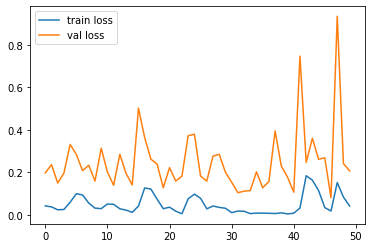

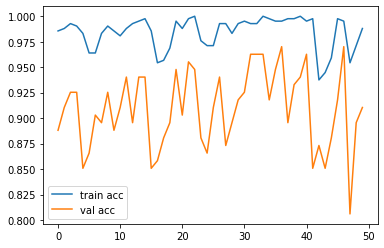

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
ypred = model.predict(test_set)

In [ ]:
ypred

array([[1.61936216e-03, 9.98380661e-01],
       [1.00000000e+00, 4.86846208e-32],
       [9.99945402e-01, 5.45807925e-05],
       [9.99999762e-01, 2.85676919e-07],
       [2.36094762e-02, 9.76390481e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.24966701e-16],
       [5.46011375e-03, 9.94539917e-01],
       [6.54423516e-03, 9.93455708e-01],
       [1.00000000e+00, 3.83815729e-10],
       [1.00000000e+00, 6.73898804e-22],
       [1.00000000e+00, 2.30862794e-14],
       [5.19282650e-04, 9.99480784e-01],
       [4.02821694e-03, 9.95971739e-01],
       [8.80591385e-03, 9.91194069e-01],
       [1.00000000e+00, 2.07683377e-19],
       [2.03223340e-03, 9.97967780e-01],
       [1.00000000e+00, 1.74593169e-13],
       [9.99999762e-01, 1.83737768e-07],
       [1.13223426e-01, 8.86776507e-01],
       [1.00000000e+00, 2.44293252e-09],
       [1.00000000e+00, 2.71216360e-09],
       [2.17404729e-03, 9.97825921e-01],
       [4.38689440e-02, 9.56131041e-01],
       [1.116208

In [ ]:
import numpy as np
pred = np.argmax(ypred,axis=1)

In [ ]:
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1])